In [1]:
#C:\Users\The Grand Tabaxi\Github repository\Finnian-Speier\In class\'Interest in housing'

For my first dataset I downloaded the real medain cost of a house over time from https://dqydj.com/historical-home-prices/ and I also downloaded the median 30 year fixed morgage rate from FRED. These are likly related beacuse the as cheap loans become avalible more poeple enter the housing market, so price should go up when interest rates go down. 
For my second dataset I looked at the dow Jones and unemployment, these two are related beacuse the dow should give us some picture of how large buissness are doing, and if they are doing poorly it means they will likly hire less and have to lay people off, meaning a higher uneplyment rate.
Finnally I looked at the top tax rate in the US and the NASDAQ, since as taxes rise people will be able to spend less on disgressionary things, and will be able to invest less witch will hurt buissness, and the  NASDAQ should give us some picture of that

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel(r"C:\Users\The Grand Tabaxi\Github repository\Finnian-Speier\Homework\Intrest in housing.xlsx")
#Interest rate
#Real house price
#Highest tax rate
#NASDAQCOM
#DJIA
#Unemployment

<AxesSubplot:title={'center':'Interest rate as it realates to housing price'}, xlabel='Date'>

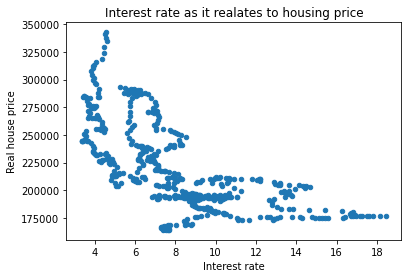

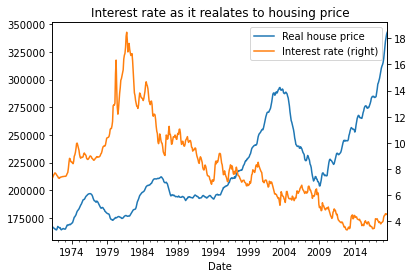

In [3]:
#interest rate and real house price 
df.plot(kind='scatter',y='Real house price',x='Interest rate',title='Interest rate as it realates to housing price')
df.plot(kind='line',y=['Real house price','Interest rate'],x='Date',secondary_y ='Interest rate' 
        ,title='Interest rate as it realates to housing price')
#There is a strong corrolation but it also seems like there is somthing else driving housing prtices in more recent years


<AxesSubplot:title={'center':'Tax rates as they relate to the NASDAQ'}, xlabel='date'>

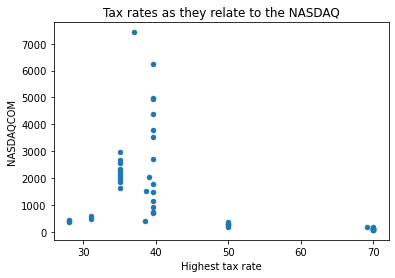

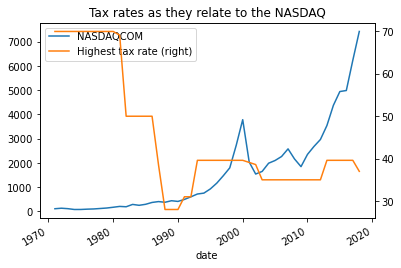

In [4]:
#highest tax rate and NASDAQ
df.plot(kind='scatter',y='NASDAQCOM',x='Highest tax rate',title='Tax rates as they relate to the NASDAQ')
df.plot(kind='line',y=['NASDAQCOM','Highest tax rate'],x='date',
        secondary_y='Highest tax rate',title='Tax rates as they relate to the NASDAQ')
#There is a much weaker corrolation then I though, But the corrolationo could be delayed 

Index(['Date', 'Interest rate', 'Real house price', 'Fed interest rate',
       'date', 'Highest tax rate', 'NASDAQCOM', 'observation_date', 'DJIA',
       'Unemployment'],
      dtype='object')

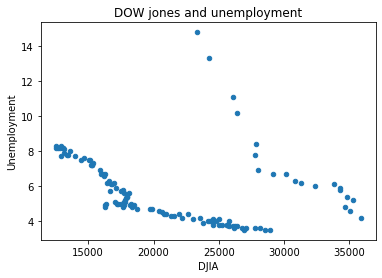

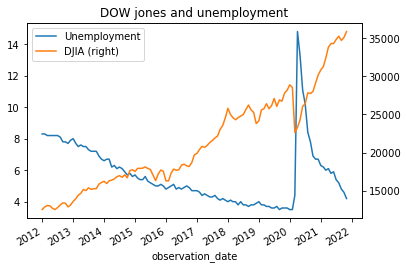

In [5]:
df.plot(kind='scatter',y='Unemployment',x='DJIA',title='DOW jones and unemployment')
df.plot(kind='line',x='observation_date',y=['Unemployment','DJIA'],secondary_y='DJIA',title='DOW jones and unemployment')
df.keys()
#very strong corrolaion here but the dow seems more volitile witch makes sence

In [6]:
import stats
stat = stats.stats()
data = pd.read_excel(r'C:\Users\The Grand Tabaxi\Github repository\Finnian-Speier\Homework\Matrix Heatmap data.xls', 
                    index_col = 0, 
                    header = [0]
                    )

You created an instance of stats()


In [7]:
corr_dict = {}
stats_dict={}
cov_dict={}

In [8]:
for key1, vec1 in data.items():
    stats_dict[key1] = {}
    stats_dict[key1]["mean"] = stat.mean(list(vec1))
    stats_dict[key1]["median"] = stat.median(vec1)
    stats_dict[key1]["variance"] = stat.variance(vec1)
    stats_dict[key1]["standard deviation"] = stat.SD(vec1, sample = True)
    stats_dict[key1]["skewness"] = stat.skewness(vec1, sample = True)
    stats_dict[key1]["kurtosis"] = stat.kurtosis(vec1, sample = True)
    cov_dict[key1] = {}
    corr_dict[key1] = {}
    for key2, vec2 in data.items():
        cov_dict[key1][key2] =stat.covariance(vec1, vec2, sample = True)
        corr_dict[key1][key2] = stat.correlation(vec1, vec2)


In [9]:
stats_DF = pd.DataFrame(stats_dict)
cov_DF = pd.DataFrame(cov_dict).sort_index(axis = 0).sort_index(axis = 1)
corr_DF = pd.DataFrame(corr_dict).sort_index(axis = 0).sort_index(axis = 1)

In [10]:
cov_dict

corr_DF.to_csv("Matrix Heatmap data.csv")

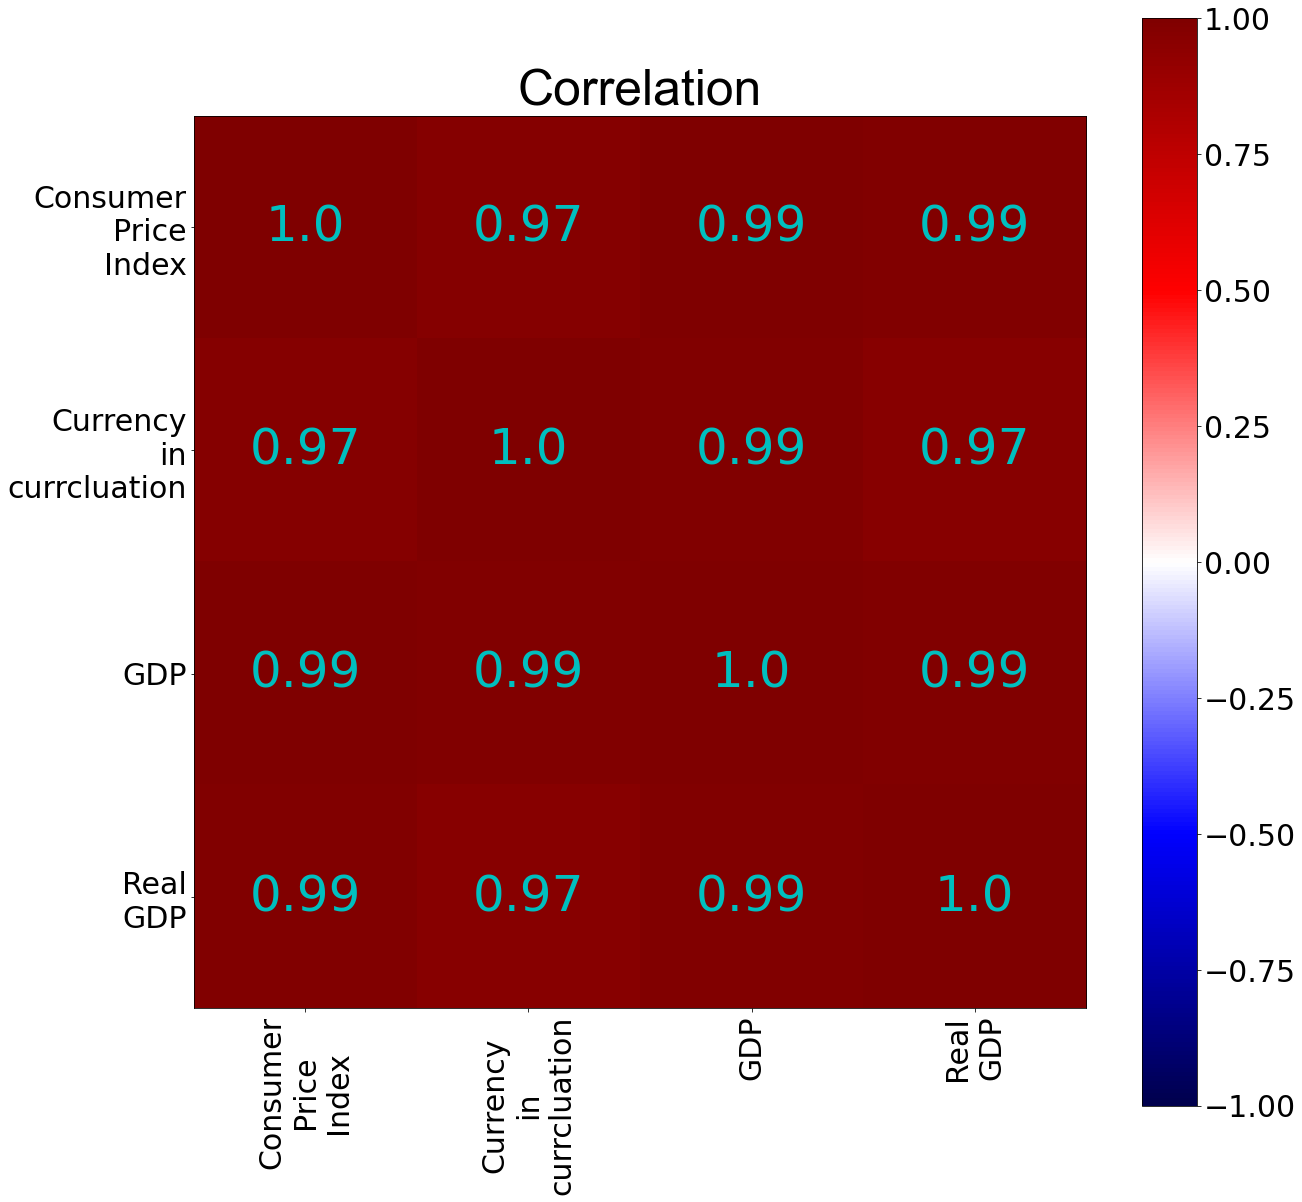

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
 
def corr_matrix_heatmap(data,pp):  
    #this is a funtion to make a heat map that we will be applying later 
    fig, ax = plt.subplots(figsize=(20,20))  
    # imshow achually makes the heat map
    # shows red as corrolated and blue as less corrolated
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # makes lables that replace the blank spaes with a new line
    
    labels = data.keys()
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # ajusts font size and color for the charts 
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # gives us some more space for lables  
    x_ticks = np.arange(num_vars)  
    # rotates the lables 90 digrees 
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # gives the lables some room 
    y_ticks = np.arange(len(labels))  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "c")  
    # makes the font Arial (the best font)
    title_font = {"fontname":"Arial"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #shows a scale for the c axsus 
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()
pp = PdfPages("Economic Freedom Plots.pdf")
corr_data = pd.read_csv('Matrix Heatmap data.csv', index_col = [0])
corr_matrix_heatmap(corr_data,pp)

In [46]:
import stats
stat = stats.stats()
data2 = pd.read_excel(r'C:\Users\The Grand Tabaxi\Github repository\Finnian-Speier\Homework\Change matrix.xls', 
                    index_col = 0, 
                    header = [0]
                    )

You created an instance of stats()


In [47]:
corr_dict = {}
stats_dict={}
cov_dict={}

In [48]:
for key1, vec1 in data2.items():
    stats_dict[key1] = {}
    stats_dict[key1]["mean"] = stat.mean(list(vec1))
    stats_dict[key1]["median"] = stat.median(vec1)
    stats_dict[key1]["variance"] = stat.variance(vec1)
    stats_dict[key1]["standard deviation"] = stat.SD(vec1, sample = True)
    stats_dict[key1]["skewness"] = stat.skewness(vec1, sample = True)
    stats_dict[key1]["kurtosis"] = stat.kurtosis(vec1, sample = True)
    cov_dict[key1] = {}
    corr_dict[key1] = {}
    for key2, vec2 in data.items():
        cov_dict[key1][key2] =stat.covariance(vec1, vec2, sample = True)
        corr_dict[key1][key2] = stat.correlation(vec1, vec2)



List lengths are not equal
List1: 25
List2: 26
List lengths are not equal
List1: 25
List2: 26


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [49]:
stats_DF = pd.DataFrame(stats_dict)
cov_DF = pd.DataFrame(cov_dict).sort_index(axis = 0).sort_index(axis = 1)
corr_DF = pd.DataFrame(corr_dict).sort_index(axis = 0).sort_index(axis = 1)

corr_DF.to_csv("Change Matrix Heatmap data.csv")

TypeError: Image data of dtype object cannot be converted to float

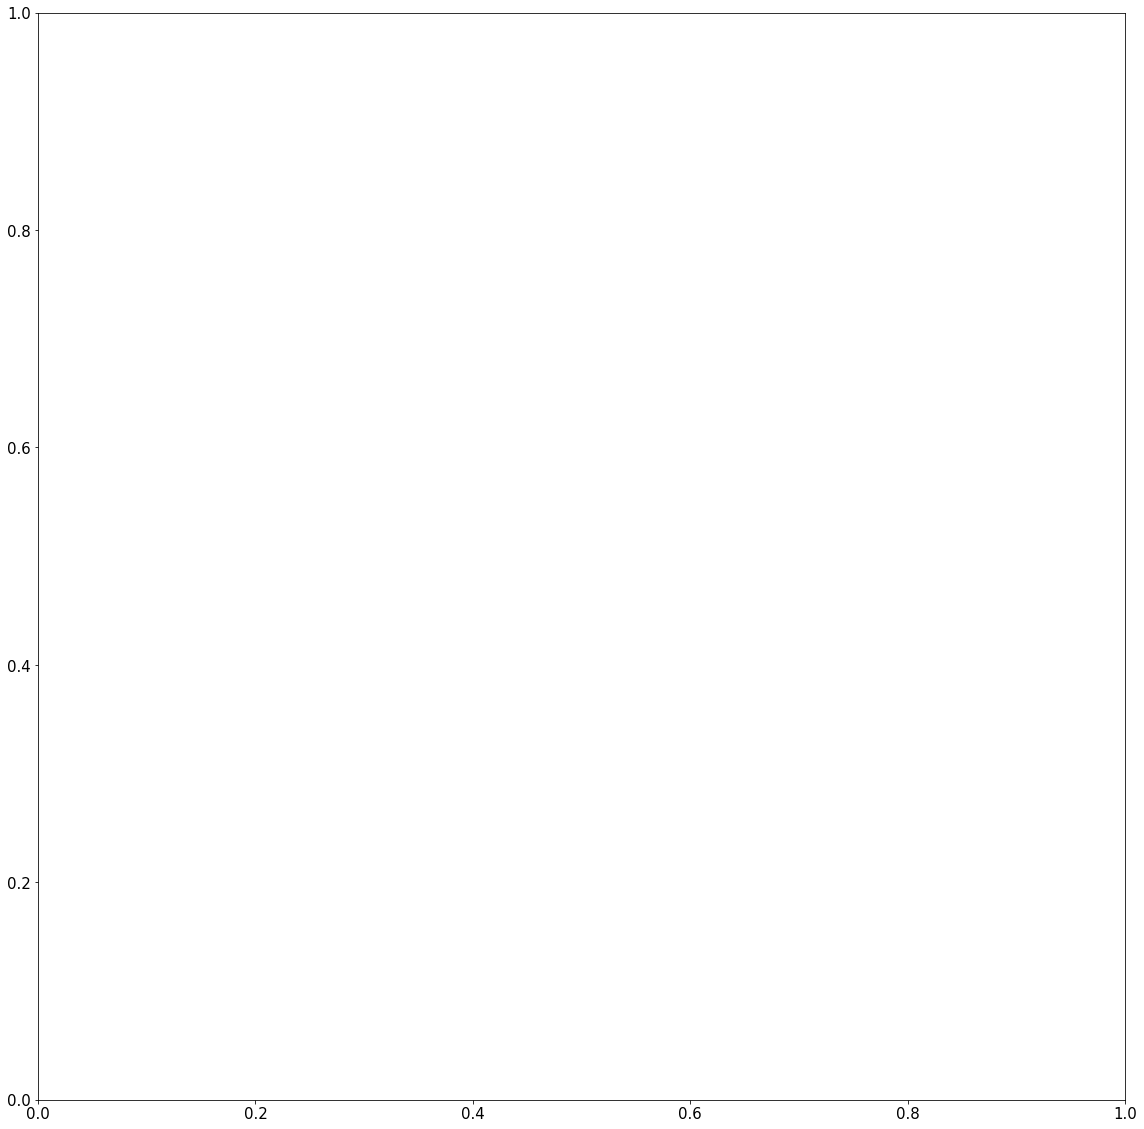

In [45]:
corr_data = pd.read_csv('Change Matrix Heatmap data.csv', index_col = [0])
corr_matrix_heatmap(corr_data,pp)
#I am doing this the same way I did the first one, I dont know what is wrong or how to fix it 